In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_squared_error

from statsmodels.tsa.stattools import adfuller

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from datetime import datetime
from datetime import timedelta

from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

## Accuracy testing

In [10]:
columns_to_extract = ['237', '132', '239', '48', '107', '164', '162', '90', '170', '138']

warnings.filterwarnings('ignore')

for region in columns_to_extract:
  df = pd.read_csv('merged_taxi.csv')
  df = df.set_index('date')
  df.index = pd.to_datetime(df.index)

  # region = '138'

  df = pd.DataFrame(df[region])

  def create_features(df):
      """
      Create time series features based on time series index.
      """
      df = df.copy()
      df['dayofweek'] = df.index.dayofweek #Monday = 0, Sunday = 6
      df['quarter'] = df.index.quarter
      df['month'] = df.index.month
      df['year'] = df.index.year
      df['lag1'] = df[region].shift(1)
      return df

  df = create_features(df)

  train = df.loc[ (df.index >= '2021-01-01') & (df.index <= '2023-09-30')]
  test = df.loc[(df.index >= '2023-10-01') & (df.index <= '2023-11-30')]

  FEATURES = ['dayofweek', 'quarter', 'month', 'year', 'lag1']
  TARGET = region

  X_train = train[FEATURES]
  y_train = train[TARGET]

  X_test = test[FEATURES]
  y_test = test[TARGET]

  reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                         n_estimators=1000,

                         objective='reg:squarederror',
                         max_depth=2,
                         learning_rate=0.01)
  reg.fit(X_train, y_train,
          verbose=100)

  test['prediction'] = reg.predict(X_test)

  actual = np.array([test[region]])
  predicted = np.array([test['prediction']])

  # Mask to exclude instances where the actual value is zero
  mask = actual >= 10


  actual_safe = actual[mask]
  predicted_safe = predicted[mask]

  print(region)

  mape = np.mean(np.abs((actual_safe - predicted_safe) / actual_safe)) * 100
  print(f"MAPE: {mape}%")

warnings.filterwarnings('default')

  # # Calculate MAPE using only the filtered values
  # mape = np.mean(np.abs((actual[mask] - predicted[mask]) / actual[mask])) * 100
  # print(f"MAPE: {mape}%")

  # rms = np.sqrt(mean_squared_error(test[region], test['prediction']))
  # print(rms)

# df = pd.read_csv('merged_taxi.csv')
# df = df.set_index('date')
# df.index = pd.to_datetime(df.index)

# region = '138'

# df = pd.DataFrame(df[region])

# def create_features(df):
#     """
#     Create time series features based on time series index.
#     """
#     df = df.copy()
#     df['dayofweek'] = df.index.dayofweek #Monday = 0, Sunday = 6
#     df['quarter'] = df.index.quarter
#     df['month'] = df.index.month
#     df['year'] = df.index.year
#     df['lag1'] = df[region].shift(1)
#     return df

# df = create_features(df)

# train = df.loc[df.index < '2023-03-31']
# test = df.loc[(df.index >= '2023-10-01') & (df.index <= '2023-12-31')]

# FEATURES = ['dayofweek', 'quarter', 'month', 'year', 'lag1']
# TARGET = region

# X_train = train[FEATURES]
# y_train = train[TARGET]

# X_test = test[FEATURES]
# y_test = test[TARGET]

# reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
#                        n_estimators=1000,

#                        objective='reg:squarederror',
#                        max_depth=2,
#                        learning_rate=0.01)
# reg.fit(X_train, y_train,
#         verbose=100)

# test['prediction'] = reg.predict(X_test)

# actual = np.array([test[region]])
# predicted = np.array([test['prediction']])

# # Mask to exclude instances where the actual value is zero
# mask = actual >= 10


# actual_safe = actual[mask]
# predicted_safe = predicted[mask]

# mape = np.mean(np.abs((actual_safe - predicted_safe) / actual_safe)) * 100
# print(f"MAPE: {mape}%")

# # # Calculate MAPE using only the filtered values
# # mape = np.mean(np.abs((actual[mask] - predicted[mask]) / actual[mask])) * 100
# # print(f"MAPE: {mape}%")

# rms = np.sqrt(mean_squared_error(test[region], test['prediction']))
# print(rms)



237
MAPE: 7.522229721909588%
132
MAPE: 7.797277124113458%
239
MAPE: 5.299675788300158%
48
MAPE: 6.212444285909517%
107
MAPE: 7.946250375478274%
164
MAPE: 9.216056748221089%
162
MAPE: 7.616783402106651%
90
MAPE: 8.672865637055512%
170
MAPE: 7.651271430204885%
138
MAPE: 14.051627910688405%


In [68]:
df = pd.read_csv('merged_taxi.csv')
df = df.set_index('date')
df.index = pd.to_datetime(df.index)

region = '48'

df = pd.DataFrame(df[region])

def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['dayofweek'] = df.index.dayofweek #Monday = 0, Sunday = 6
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['lag1'] = df[region].shift(1)
    return df

df = create_features(df)

train = df.loc[df.index < '2023-03-31']
test = df.loc[(df.index >= '2023-10-01') & (df.index <= '2023-12-31')]

FEATURES = ['dayofweek', 'quarter', 'month', 'year', 'lag1']
TARGET = region

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,

                       objective='reg:squarederror',
                       max_depth=2,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        verbose=100)

test['prediction'] = reg.predict(X_test)

actual = np.array([test[region]])
predicted = np.array([test['prediction']])

# Mask to exclude instances where the actual value is zero
mask = actual >= 10


actual_safe = actual[mask]
predicted_safe = predicted[mask]

mape = np.mean(np.abs((actual_safe - predicted_safe) / actual_safe)) * 100
print(f"MAPE: {mape}%")

# # Calculate MAPE using only the filtered values
# mape = np.mean(np.abs((actual[mask] - predicted[mask]) / actual[mask])) * 100
# print(f"MAPE: {mape}%")

rms = np.sqrt(mean_squared_error(test[region], test['prediction']))
print(rms)

MAPE: 7.139314478321508%
217.66309529938002


<ipython-input-68-eb56d093f0e6>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


In [38]:
import numpy as np

# Example set of three numbers
numbers = np.array([6.94, 9.99, 7.84])

# Step 1: Calculate the mean
mean = np.mean(numbers)

# Step 2: Calculate the deviations from the mean
deviations = numbers - mean

# Step 3: Square the deviations
squared_deviations = deviations ** 2

# Step 4: Calculate the variance (mean of squared deviations)
variance = np.mean(squared_deviations)

print(f"Variance: {variance}")

Variance: 1.6372222222222224


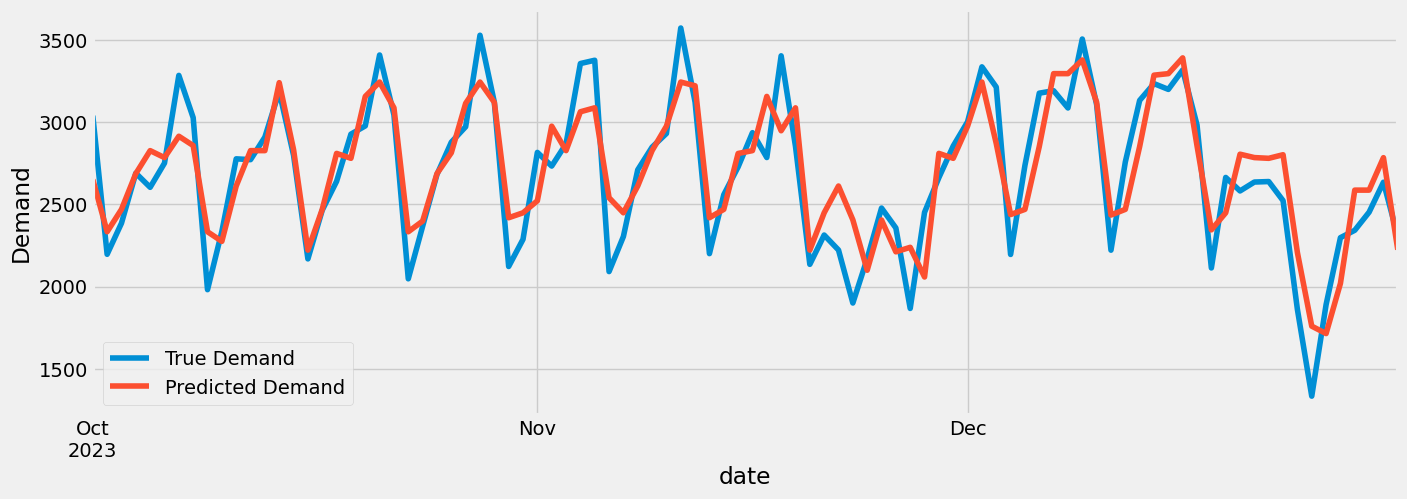

In [69]:
test[region].plot(figsize=(15, 5))
test['prediction'].plot(figsize=(15, 5))
plt.legend(['True Demand', 'Predicted Demand'])
plt.ylabel('Demand')
plt.show()

## Test Bed

In [ ]:
df = pd.read_csv('merged_taxi.csv')
df = df.set_index('date')
df.index = pd.to_datetime(df.index)

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,1,2,3,4,5,6,7,8,...,256,257,258,259,260,261,262,263,264,265
date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,0,0,0,0,1,27,0,0,32,2,...,8,0,0,2,12,94,285,672,213,7
2021-01-02,1,1,0,0,0,24,0,0,40,0,...,1,0,0,0,11,132,448,915,251,7
2021-01-03,2,2,0,0,0,16,0,0,24,0,...,2,0,0,0,8,72,323,656,184,4
2021-01-04,3,3,0,0,1,23,0,0,43,1,...,9,0,1,0,12,87,703,1076,297,11
2021-01-05,4,4,0,0,1,22,0,0,41,0,...,3,1,1,0,9,101,789,1110,292,6


In [ ]:
df = pd.DataFrame(df['237'])


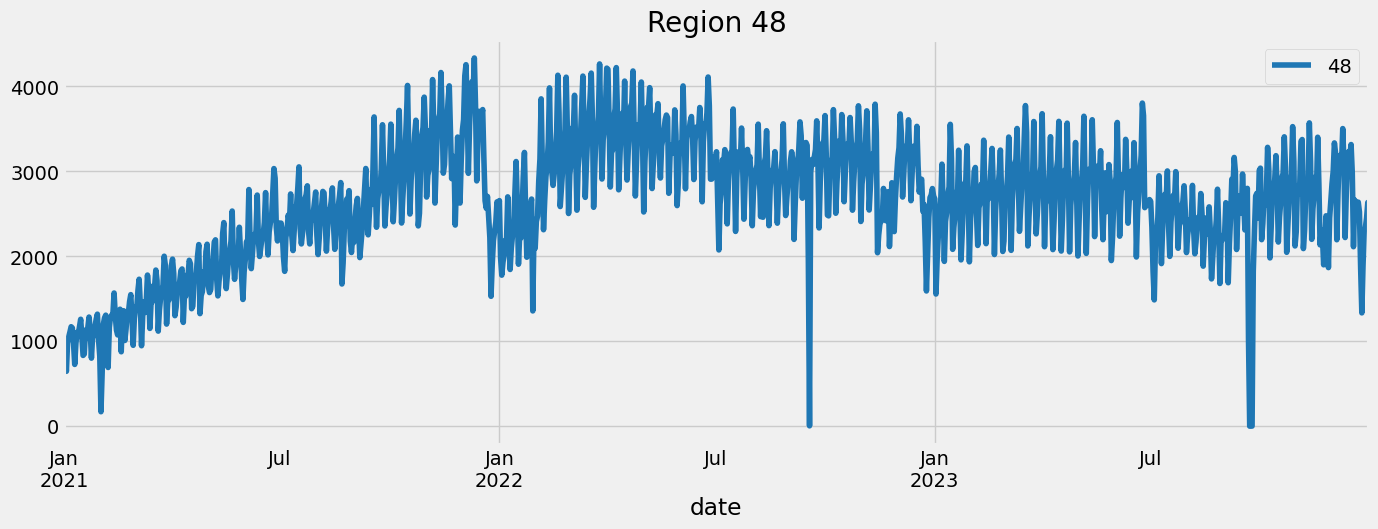

In [ ]:
df.plot(figsize=(15, 5),
        color=color_pal[0],
        title='Region 48')
plt.show()

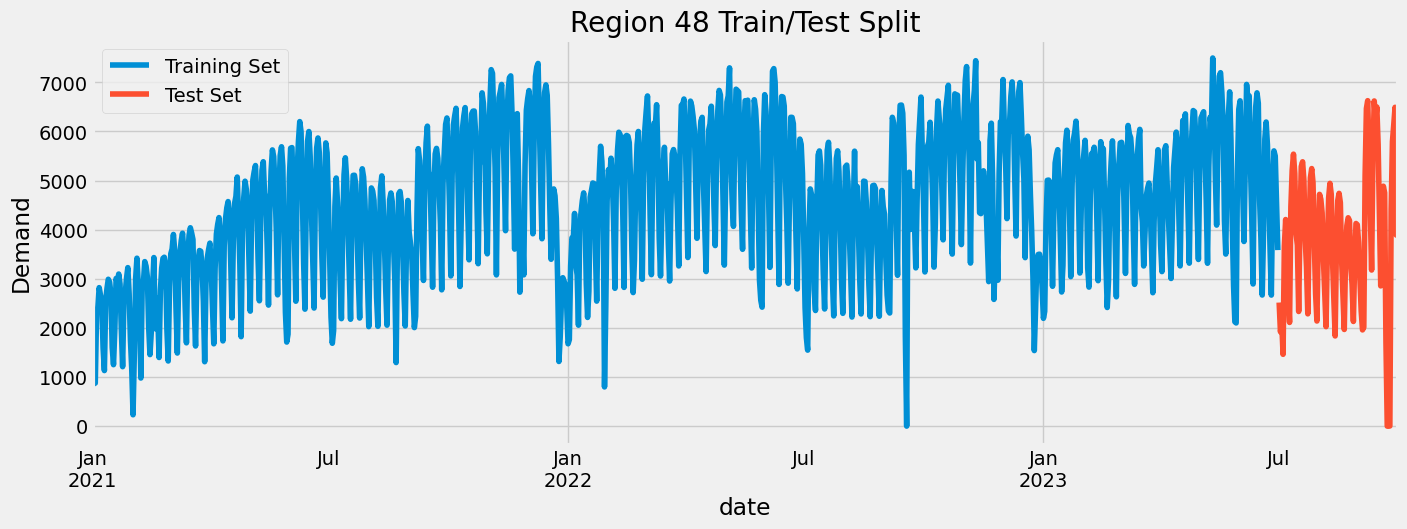

In [ ]:
#initial train test split

train = df.loc[df.index < '2023-07-01']
test = df.loc[(df.index >= '2023-07-01') & (df.index <= '2023-09-30')]

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Region 48 Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2015', color='black', ls='--')
plt.ylabel('Demand')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [ ]:
df.head(-10)

,48
date,
2021-01-01,859
2021-01-02,883
2021-01-03,646
2021-01-04,978
2021-01-05,1054
...,...
2023-12-17,2982
2023-12-18,2113
2023-12-19,2663


In [ ]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    # df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek #Monday = 0, Sunday = 6
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['lag1'] = df['237'].shift(1)
    # df['lag2'] = df['48'].shift(2)
    # df['lag3'] = df['48'].shift(3)
    # df['lag7'] = df['48'].shift(7)
    # df['dayofyear'] = df.index.dayofyear
    # df['dayofmonth'] = df.index.day
    # df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)

In [ ]:
df.head()

,237,dayofweek,quarter,month,year,lag1
date,,,,,,
2021-01-01,815,4,1,1,2021,NaN
2021-01-02,1280,5,1,1,2021,815.0
2021-01-03,877,6,1,1,2021,1280.0
2021-01-04,2291,0,1,1,2021,877.0
2021-01-05,2432,1,1,1,2021,2291.0


In [ ]:
#minimum and maximum of the column 48
print(df['132'].min())
print(df['132'].max())

4
7743


In [ ]:
train = df.loc[df.index < '2023-10-01']
test = df.loc[(df.index >= '2023-10-01') & (df.index <= '2023-12-31')]

FEATURES = ['dayofweek', 'quarter', 'month', 'year', 'lag1']
TARGET = '162'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [ ]:
print(X_train)
print(X_test)

            dayofweek  quarter  month  year  lag1
date                                             
2021-01-01          4        1      1  2021   NaN
2021-01-02          5        1      1  2021   3.0
2021-01-03          6        1      1  2021   1.0
2021-01-04          0        1      1  2021   4.0
2021-01-05          1        1      1  2021   7.0
...               ...      ...    ...   ...   ...
2023-09-26          1        3      9  2023  11.0
2023-09-27          2        3      9  2023  15.0
2023-09-28          3        3      9  2023  18.0
2023-09-29          4        3      9  2023  11.0
2023-09-30          5        3      9  2023  14.0

[1003 rows x 5 columns]
            dayofweek  quarter  month  year  lag1
date                                             
2023-10-01          6        4     10  2023  17.0
2023-10-02          0        4     10  2023  21.0
2023-10-03          1        4     10  2023  18.0
2023-10-04          2        4     10  2023  24.0
2023-10-05          3    

In [ ]:
# train = create_features(train)
# test = create_features(test)

# FEATURES = ['dayofweek', 'quarter', 'month', 'year', 'lag1']
# TARGET = '48'

# X_train = train[FEATURES]
# y_train = train[TARGET]

# X_test = test[FEATURES]
# y_test = test[TARGET]

In [ ]:
# print(X_train)
# print(X_test)

In [ ]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,

                       objective='reg:squarederror',
                       max_depth=2,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        verbose=100)

# reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
#                        n_estimators=1000,
#                        objective='reg:squarederror',
#                        max_depth=3,
#                        learning_rate=0.01)

# reg.fit(X_train, y_train,
#         verbose=100)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

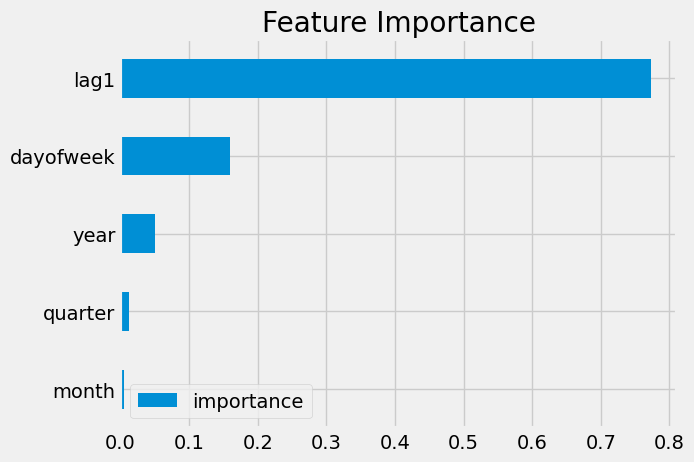

In [ ]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [ ]:
test['prediction'] = reg.predict(X_test)
# df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
# ax = df[['48']].plot(figsize=(15, 5))
# df['prediction'].plot(ax=ax, style='.')
# plt.legend(['Truth Data', 'Predictions'])
# ax.set_title('Raw Dat and Prediction')
# plt.show()

<ipython-input-198-2a16601bff29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


In [ ]:
print(test)

             162  dayofweek  quarter  month  year    lag1   prediction
date                                                                  
2023-10-01  2674          6        4     10  2023  2576.0  2339.845215
2023-10-02  3835          0        4     10  2023  2674.0  3698.780762
2023-10-03  4474          1        4     10  2023  3835.0  4404.166504
2023-10-04  4658          2        4     10  2023  4474.0  4468.331055
2023-10-05  4632          3        4     10  2023  4658.0  4469.465820
...          ...        ...      ...    ...   ...     ...          ...
2023-12-27  2788          2        4     12  2023  2807.0  3111.621826
2023-12-28  2774          3        4     12  2023  2788.0  2843.155029
2023-12-29  2743          4        4     12  2023  2774.0  2635.546143
2023-12-30  2424          5        4     12  2023  2743.0  2380.923340
2023-12-31  1984          6        4     12  2023  2424.0  2249.097168

[92 rows x 7 columns]


In [ ]:
actual = np.array([test['162']])
predicted = np.array([test['prediction']])

mape = np.mean(np.abs((actual - predicted) / actual)) * 100
print(f"MAPE: {mape}%")

MAPE: 9.011861620247677%


In [ ]:
# err = mean_squared_error(test['48'], test['prediction'])
# print(err)

rms = np.sqrt(mean_squared_error(test['162'], test['prediction']))
print(rms)

414.93947029247033


In [ ]:
test['107'].plot(figsize=(15, 5))
test['prediction'].plot(figsize=(15, 5))
plt.legend(['Truth Data', 'Predictions'])
plt.ylabel('Demand')
plt.show()

KeyError: '107'

## Largest columns

In [ ]:
df = pd.read_csv('merged_taxi.csv')
df = df.set_index('date')
df.index = pd.to_datetime(df.index)

In [ ]:
# Calculate the sum of each column
column_sums = df.sum()

# Identify the five columns with the highest sum
top_columns = column_sums.nlargest(100)

for i in range(len(top_columns)):
    print(f"{top_columns.index[i]} {top_columns[i]}")

#print(top_columns)

237 4948731
132 4630424
236 4406787
161 4212594
186 3452119
162 3432685
142 3340751
170 3116120
230 3032088
138 2961550
239 2909506
48 2899496
163 2871671
234 2727557
141 2675957
68 2539561
79 2495991
107 2330587
164 2251892
249 2164564
263 2142830
238 2126782
229 2115291
140 2097214
43 1765235
90 1741651
100 1684870
246 1535722
113 1375923
262 1361077
231 1348606
233 1310041
137 1263155
114 1232456
143 1182375
264 959085
148 957372
151 933806
144 829794
158 763457
75 725609
211 715981
50 695564
Unnamed: 0.1 598965
13 562036
87 527562
166 518373
125 498649
261 486095
70 382106
24 307534
41 302342
74 290798
88 265039
Unnamed: 0 199290
209 173369
224 135369
232 132293
45 123425
42 104639
4 96967
116 85963
244 80538
152 76029
226 72651
65 64229
7 51164
146 51156
33 43372
12 41047
145 40667
97 35512
25 34949
10 27439
255 26924
181 25853
256 25031
66 23562
52 19973
193 19141
260 18893
223 18618
129 18131
179 16927
93 15360
265 13888
80 12631
40 12336
243 11744
82 11585
112 11566
130 11510
6

## Final implementation

In [ ]:
df = pd.read_csv('merged_taxi.csv')
df = df.set_index('date')
df.index = pd.to_datetime(df.index)

In [ ]:
def create_features(df, region):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['dayofweek'] = df.index.dayofweek #Monday = 0, Sunday = 6
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['lag1'] = df[region].shift(1)
    return df



In [ ]:
columns_to_extract = ['237', '132', '239', '48', '107', '164', '43', '90', '211', '50']

trained_models = []

for region in columns_to_extract:
    extracted_df = pd.DataFrame(df[region])
    # extracted_df = df[region]
    # print(extracted_df.head())

    extracted_df = create_features(extracted_df, region)

    # print(extracted_df.head())

    train = extracted_df.loc[extracted_df.index < '2023-10-01']
    test = extracted_df.loc[(extracted_df.index >= '2023-10-01') & (extracted_df.index <= '2023-12-31')]

    FEATURES = ['dayofweek', 'quarter', 'month', 'year', 'lag1']
    TARGET = region

    X_train = train[FEATURES]
    y_train = train[TARGET]

    # X_test = test[FEATURES]
    # y_test = test[TARGET]

    # print(X_train)
    # print(X_test)

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,

                       objective='reg:squarederror',
                       max_depth=2,
                       learning_rate=0.01)

    reg.fit(X_train, y_train, verbose=100)

    trained_models.append(reg)





In [ ]:
# predictions

date = input("Enter date : ")
date = datetime.strptime(date, '%Y-%m-%d')


# print(date)

predictions = []

i = 0

for reg in trained_models:
  region = columns_to_extract[i]

  pred_df = pd.DataFrame(df[region])
  pred_df = pred_df.loc[(pred_df.index == date ) | (pred_df.index == date - timedelta(days=1))]
  pred_df = create_features(pred_df, region)
  pred_df = pred_df.dropna()
  # print(pred_df) # for comparison purposes only
  X_test = pred_df[FEATURES]
  # print(X_test)
  demand_pred = reg.predict(X_test)
  predictions.append(demand_pred)
  i += 1

Enter date : 2023-12-15
             237  dayofweek  quarter  month  year    lag1
date                                                     
2023-12-15  6714          4        4     12  2023  7523.0
             132  dayofweek  quarter  month  year    lag1
date                                                     
2023-12-15  4954          4        4     12  2023  4597.0
             239  dayofweek  quarter  month  year    lag1
date                                                     
2023-12-15  3580          4        4     12  2023  3513.0
              48  dayofweek  quarter  month  year    lag1
date                                                     
2023-12-15  3198          4        4     12  2023  3233.0
             107  dayofweek  quarter  month  year    lag1
date                                                     
2023-12-15  3059          4        4     12  2023  3023.0
             164  dayofweek  quarter  month  year    lag1
date                                            

In [ ]:
for i in range(len(predictions)):
  print(columns_to_extract[i], predictions[i])

237 [6079.63]
132 [4626.348]
239 [3471.6453]
48 [3262.148]
107 [3206.68]
164 [2682.9055]
43 [2088.9766]
90 [2082.6172]
211 [929.85284]
50 [723.6478]


In [ ]:
output_df = pd.DataFrame(columns=['region', 'demand'])

for i in range(len(predictions)):
  # Use pd.concat instead of .append
  output_df = pd.concat([output_df, pd.DataFrame({'region': [columns_to_extract[i]], 'demand': predictions[i]})], ignore_index=True)

print(output_df)

  region       demand
0    237  6079.629883
1    132  4626.348145
2    239  3471.645264
3     48  3262.147949
4    107  3206.679932
5    164  2682.905518
6     43  2088.976562
7     90  2082.617188
8    211   929.852844
9     50   723.647827


## Rolling window

In [ ]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    # df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek #Monday = 0, Sunday = 6
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    # df['dayofyear'] = df.index.dayofyear
    # df['dayofmonth'] = df.index.day
    # df['weekofyear'] = df.index.isocalendar().week
    return df

In [ ]:
df = pd.read_csv('merged_taxi.csv')
df = df.set_index('date')
df.index = pd.to_datetime(df.index)


In [ ]:
column_132 = df['48']

# Calculate the minimum and maximum values
min_value = column_132.min()
max_value = column_132.max()

print(f"The minimum value in column 132 is: {min_value}")
print(f"The maximum value in column 132 is: {max_value}")

The minimum value in column 132 is: 0
The maximum value in column 132 is: 4335


In [ ]:
df = pd.DataFrame(df['48'])

In [ ]:
FEATURES = ['dayofweek', 'quarter', 'month', 'year']
TARGET = '48'

In [ ]:
# prompt: implement a rolling window to predict 1 day at a time

start = datetime(2023, 10, 1)
train = df.loc[df.index < start]

forecast_range = 90

predictions = []

for i in range(forecast_range):

  train = df.loc[df.index < start + timedelta(days=i)]
  test = df.loc[df.index == start + timedelta(days=i)]



  train = create_features(train)
  test = create_features(test)

  print(train)
  print(test)

  X_train = train[FEATURES]
  y_train = train[TARGET]

  X_test = test[FEATURES]

  print(X_test)

  reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       objective='reg:squarederror',
                       max_depth=3,
                       learning_rate=0.01)

  reg.fit(X_train, y_train,
        verbose=100)

  test['prediction'] = reg.predict(X_test)

  predictions.append(test['prediction'])



              48  dayofweek  quarter  month  year
date                                             
2021-01-01   859          4        1      1  2021
2021-01-02   883          5        1      1  2021
2021-01-03   646          6        1      1  2021
2021-01-04   978          0        1      1  2021
2021-01-05  1054          1        1      1  2021
...          ...        ...      ...    ...   ...
2023-09-26  2303          1        3      9  2023
2023-09-27  2710          2        3      9  2023
2023-09-28  2742          3        3      9  2023
2023-09-29  2453          4        3      9  2023
2023-09-30  3010          5        3      9  2023

[1003 rows x 5 columns]
              48  dayofweek  quarter  month  year
date                                             
2023-10-01  3038          6        4     10  2023
            dayofweek  quarter  month  year
date                                       
2023-10-01          6        4     10  2023
              48  dayofweek  quarter  month

In [ ]:
print(predictions)

[date
2023-10-01    2370.256348
Name: prediction, dtype: float32, date
2023-10-02    2251.12915
Name: prediction, dtype: float32, date
2023-10-03    2503.243896
Name: prediction, dtype: float32, date
2023-10-04    2675.630859
Name: prediction, dtype: float32, date
2023-10-05    2627.451416
Name: prediction, dtype: float32, date
2023-10-06    2686.094482
Name: prediction, dtype: float32, date
2023-10-07    2973.214844
Name: prediction, dtype: float32, date
2023-10-08    2840.385254
Name: prediction, dtype: float32, date
2023-10-09    2158.771484
Name: prediction, dtype: float32, date
2023-10-10    2413.612305
Name: prediction, dtype: float32, date
2023-10-11    2650.638672
Name: prediction, dtype: float32, date
2023-10-12    2584.96875
Name: prediction, dtype: float32, date
2023-10-13    2662.868652
Name: prediction, dtype: float32, date
2023-10-14    3102.711426
Name: prediction, dtype: float32, date
2023-10-15    2843.609375
Name: prediction, dtype: float32, date
2023-10-16    2137.71

In [ ]:
df_predictions = pd.concat(predictions)
print(df_predictions)

date
2023-10-01    2370.256348
2023-10-02    2251.129150
2023-10-03    2503.243896
2023-10-04    2675.630859
2023-10-05    2627.451416
                 ...     
2023-12-25    2235.148438
2023-12-26    2561.697021
2023-12-27    2783.564697
2023-12-28    2806.337891
2023-12-29    2830.485107
Name: prediction, Length: 90, dtype: float32


In [ ]:
filtered_range = df.loc[df.index >= start]
filtered_range = filtered_range.loc[filtered_range.index < start + timedelta(days=forecast_range)]
print(filtered_range)

              48
date            
2023-10-01  3038
2023-10-02  2196
2023-10-03  2385
2023-10-04  2689
2023-10-05  2603
...          ...
2023-12-25  1334
2023-12-26  1890
2023-12-27  2297
2023-12-28  2342
2023-12-29  2452

[90 rows x 1 columns]


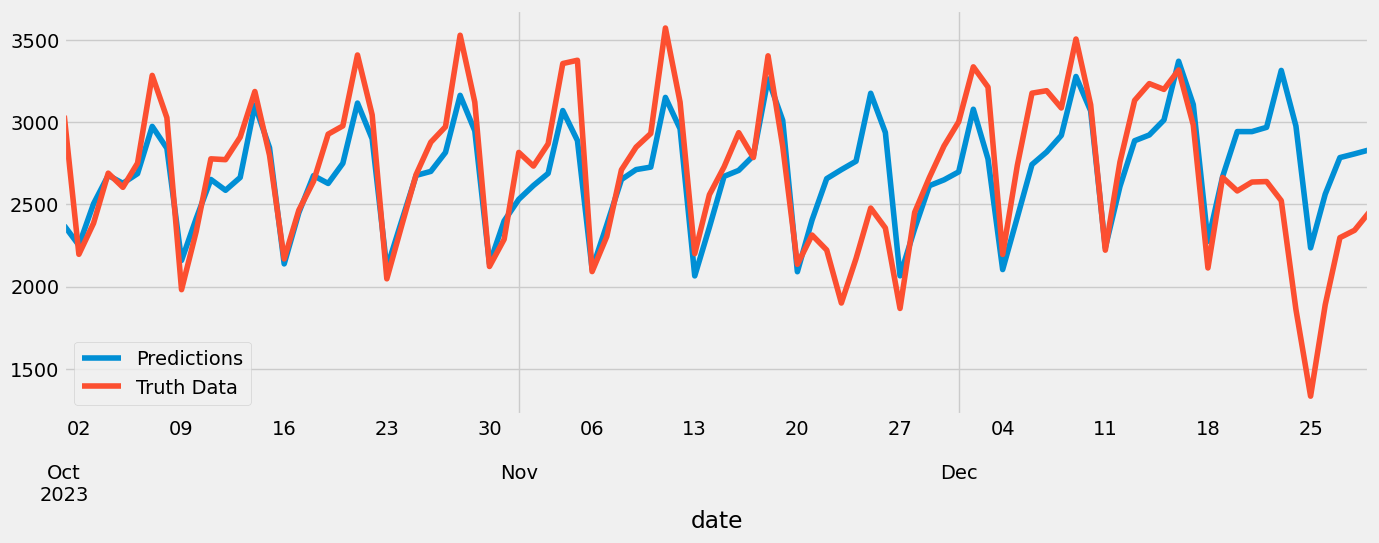

In [ ]:
df_predictions.plot(figsize=(15, 5))
filtered_range['48'].plot(figsize=(15, 5))
plt.legend(['Predictions', 'Truth Data'])
plt.show()

In [ ]:
rms = np.sqrt(mean_squared_error(filtered_range['48'], predictions))
print(rms)

323.62391055734923


## Demand Prediction

In [ ]:
# feature creation function

def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    # df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek #Monday = 0, Sunday = 6
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    # df['dayofyear'] = df.index.dayofyear
    # df['dayofmonth'] = df.index.day
    # df['weekofyear'] = df.index.isocalendar().week
    return df

In [ ]:
# reading the csv

df = pd.read_csv('merged_taxi.csv')
df = df.set_index('date')
df.index = pd.to_datetime(df.index)

In [ ]:
filtered_range = df.loc[df.index >= datetime(2023,10,1)]
filtered_range = filtered_range.loc[filtered_range.index < datetime(2024,1,1)]
print(filtered_range)

              48
date            
2023-10-01  3038
2023-10-02  2196
2023-10-03  2385
2023-10-04  2689
2023-10-05  2603
...          ...
2023-12-27  2297
2023-12-28  2342
2023-12-29  2452
2023-12-30  2634
2023-12-31  2305

[92 rows x 1 columns]


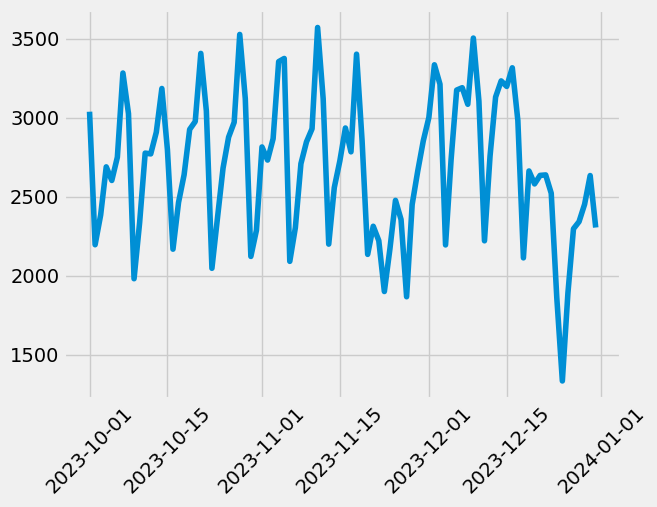

In [ ]:
plt.plot(filtered_range)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

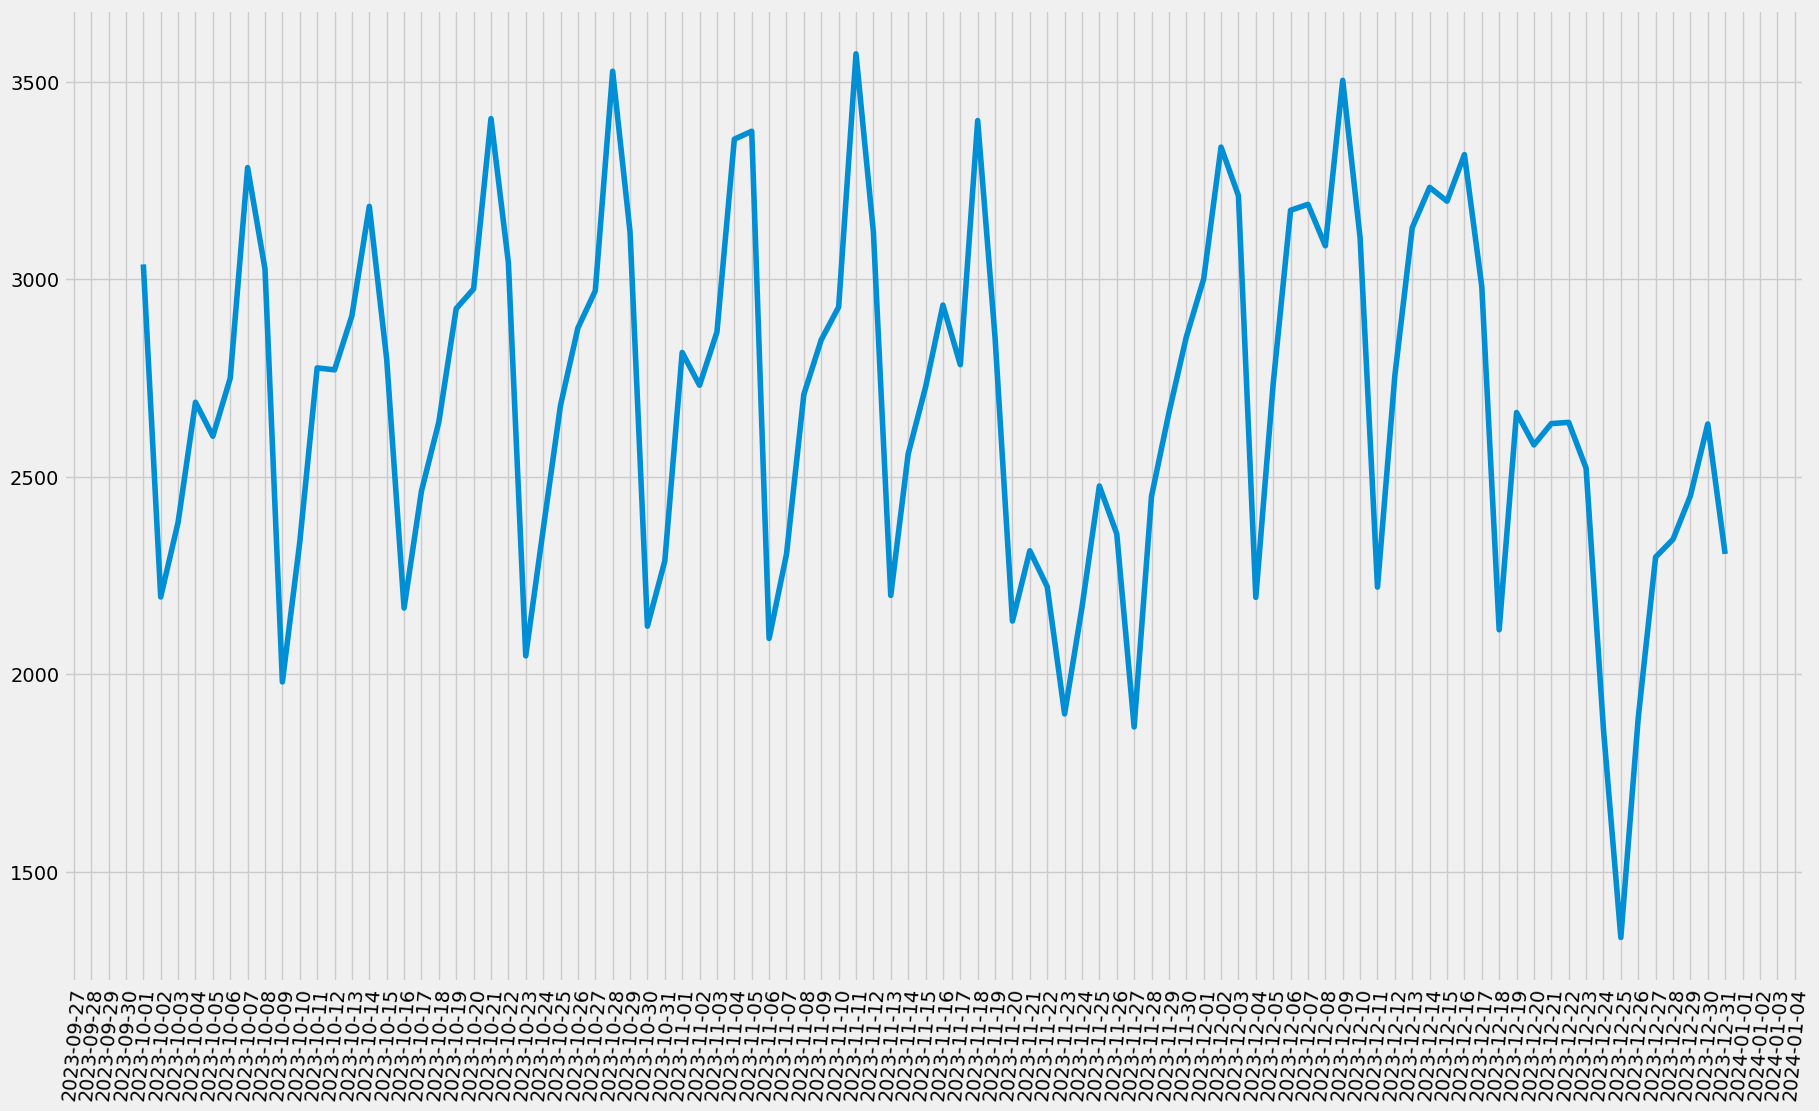

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


plt.figure(figsize=(20, 12))


plt.plot(filtered_range)

# Set major ticks format and interval
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator())
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate and format the x-axis labels for better readability
plt.xticks(rotation=85)

plt.grid(True)
plt.show()

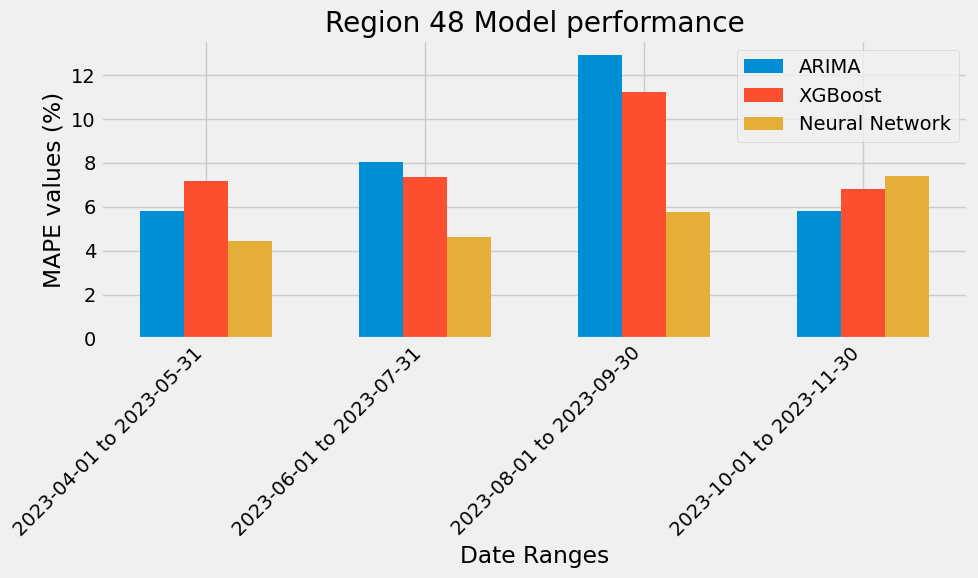

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Data
date_ranges = ['2023-04-01 to 2023-05-31', '2023-06-01 to 2023-07-31', '2023-08-01 to 2023-09-30', '2023-10-01 to 2023-11-30']
arima_values = [5.83, 8.04, 12.94, 5.83]
xgboost_values = [7.18, 7.34, 11.25, 6.83]
nn_values = [4.46, 4.62, 5.79, 7.39]

# X axis positions
x = np.arange(len(date_ranges))

# Width of bars
width = 0.20

# Plotting the bars
fig, ax = plt.subplots(figsize=(10, 6))

bars_arima = ax.bar(x - width, arima_values, width, label='ARIMA')
bars_xgboost = ax.bar(x, xgboost_values, width, label='XGBoost')
bars_nn = ax.bar(x + width, nn_values, width, label='Neural Network')

# Adding labels, title, and legend
ax.set_xlabel('Date Ranges')
ax.set_ylabel('MAPE values (%)')
ax.set_title('Region 48 Model performance')
ax.set_xticks(x)
ax.set_xticklabels(date_ranges, rotation=45, ha="right")
ax.legend()

# Display the graph
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


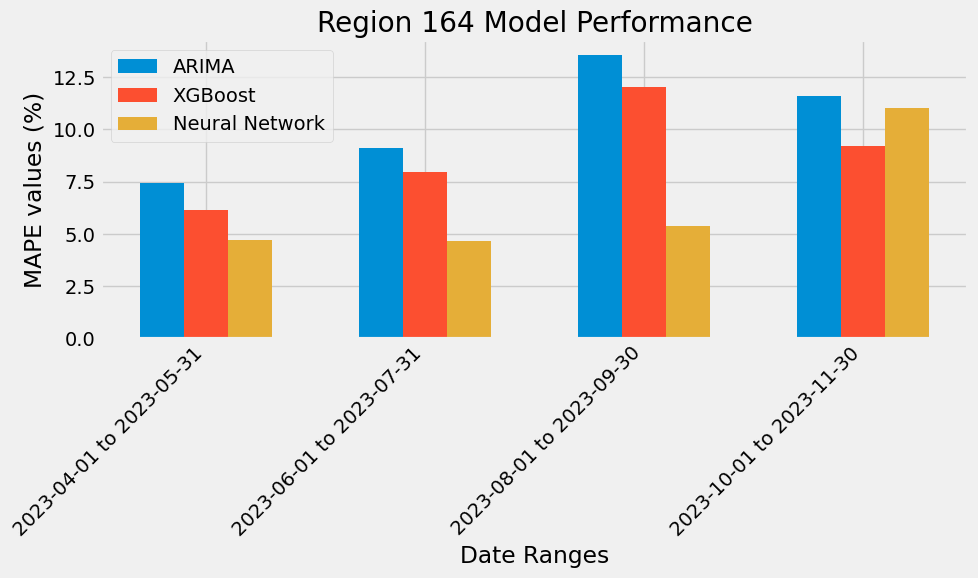

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Data
date_ranges = ['2023-04-01 to 2023-05-31', '2023-06-01 to 2023-07-31', '2023-08-01 to 2023-09-30', '2023-10-01 to 2023-11-30']
arima_values = [7.44, 9.12, 13.58, 11.61]
xgboost_values = [6.16, 7.98, 12.03, 9.23]
nn_values = [4.70, 4.67, 5.40, 11.02]

# X axis positions
x = np.arange(len(date_ranges))

# Width of bars
width = 0.20

# Plotting the bars with a specified figure size
fig, ax = plt.subplots(figsize=(10, 6))  # Change the figsize parameter as needed

bars_arima = ax.bar(x - width, arima_values, width, label='ARIMA')
bars_xgboost = ax.bar(x, xgboost_values, width, label='XGBoost')
bars_nn = ax.bar(x + width, nn_values, width, label='Neural Network')

# Adding labels, title, and legend
ax.set_xlabel('Date Ranges')
ax.set_ylabel('MAPE values (%)')
ax.set_title('Region 164 Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(date_ranges, rotation=45, ha="right")
ax.legend()

# Display the graph
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


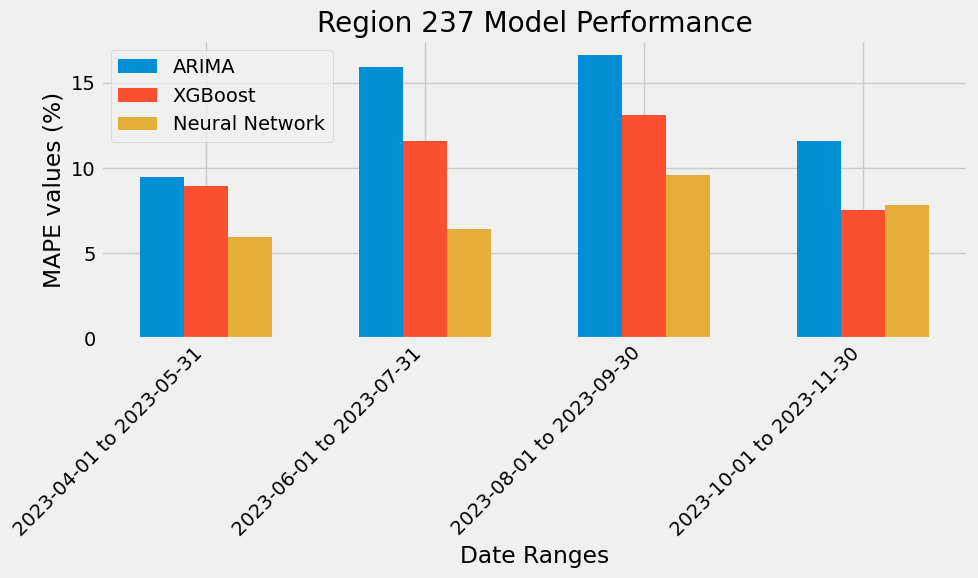

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Data
date_ranges = ['2023-04-01 to 2023-05-31', '2023-06-01 to 2023-07-31', '2023-08-01 to 2023-09-30', '2023-10-01 to 2023-11-30']
arima_values = [9.47, 15.96, 16.67, 11.62]
xgboost_values = [8.93, 11.60, 13.11, 7.52]
nn_values = [5.99, 6.42, 9.59, 7.84]

# X axis positions
x = np.arange(len(date_ranges))

# Width of bars
width = 0.20

# Plotting the bars with a specified figure size
fig, ax = plt.subplots(figsize=(10, 6))  # Change the figsize parameter as needed

bars_arima = ax.bar(x - width, arima_values, width, label='ARIMA')
bars_xgboost = ax.bar(x, xgboost_values, width, label='XGBoost')
bars_nn = ax.bar(x + width, nn_values, width, label='Neural Network')

# Adding labels, title, and legend
ax.set_xlabel('Date Ranges')
ax.set_ylabel('MAPE values (%)')
ax.set_title('Region 237 Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(date_ranges, rotation=45, ha="right")
ax.legend()

# Display the graph
plt.tight_layout()
plt.show()